In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%load_ext autoreload
%autoreload 2

import sys
import os
sys.path.append(os.path.join(os.getcwd(), 'drive', 'MyDrive','da2'))

from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import numpy as np

from src.d01_data import load_data, save_data
from src.d02_processing import preprocess_data, sliding_window
from src.d03_model import build_model, train_model
from src.d04_visualization import bounding_box

In [3]:
dataset = load_data.load_train_data()
train_dataset, val_dataset = preprocess_data.preprocess_train(dataset, one_hot=True, size=(224,224)) #(224,224)
class_weights = preprocess_data.class_weights(train_dataset)

Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


In [4]:
train_dataset = train_dataset.map(lambda x,y : (tf.keras.applications.resnet50.preprocess_input(x),y))
val_dataset = val_dataset.map(lambda x,y : (tf.keras.applications.resnet50.preprocess_input(x),y))

## Simple Model

In [11]:
input_shape = (224, 224, 3)

base_model = tf.keras.applications.ResNet50(include_top=False)
base_model.trainable = False

inputs = keras.Input(shape=input_shape)
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(64, activation='relu')(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.Dense(32, activation='relu')(x)
outputs = keras.layers.Dense(5, activation='softmax')(x)

model = keras.Model(inputs, outputs)

model.compile(loss='categorical_crossentropy', optimizer = Adam(), metrics=['accuracy'])

In [ ]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
history = model.fit(train_dataset, epochs=50, validation_data=val_dataset, callbacks=[es_callback])

Epoch 1/50
181/181 [==============================] - 45s 233ms/step - loss: 1.2471 - accuracy: 0.4154 - val_loss: 1.2300 - val_accuracy: 0.4254
Epoch 2/50
181/181 [==============================] - 38s 207ms/step - loss: 1.2160 - accuracy: 0.4223 - val_loss: 1.2399 - val_accuracy: 0.4254
Epoch 3/50
181/181 [==============================] - 37s 206ms/step - loss: 1.2081 - accuracy: 0.4185 - val_loss: 1.2140 - val_accuracy: 0.4254
Epoch 4/50
181/181 [==============================] - 41s 225ms/step - loss: 1.1971 - accuracy: 0.4301 - val_loss: 1.2030 - val_accuracy: 0.4254
Epoch 5/50
181/181 [==============================] - 38s 210ms/step - loss: 1.1818 - accuracy: 0.4303 - val_loss: 1.1913 - val_accuracy: 0.4248
Epoch 6/50
181/181 [==============================] - 41s 224ms/step - loss: 1.1748 - accuracy: 0.4307 - val_loss: 1.1843 - val_accuracy: 0.4316
Epoch 7/50
181/181 [==============================] - 37s 201ms/step - loss: 1.1697 - accuracy: 0.4379 - val_loss: 1.1737 - val_ac

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer = Adam(), metrics=['accuracy'])
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
history = model.fit(train_dataset, epochs=50, validation_data=val_dataset, callbacks=[es_callback])

Epoch 1/50
181/181 [==============================] - 86s 439ms/step - loss: 3.7350 - accuracy: 0.4227 - val_loss: 1.2123 - val_accuracy: 0.5342
Epoch 2/50
181/181 [==============================] - 76s 422ms/step - loss: 1.1858 - accuracy: 0.4754 - val_loss: 1.1710 - val_accuracy: 0.5226
Epoch 3/50
181/181 [==============================] - 76s 422ms/step - loss: 1.1609 - accuracy: 0.4969 - val_loss: 1.2541 - val_accuracy: 0.5383
Epoch 4/50
181/181 [==============================] - 62s 340ms/step - loss: 1.1444 - accuracy: 0.5050 - val_loss: 1.1246 - val_accuracy: 0.5513
Epoch 5/50
181/181 [==============================] - 76s 422ms/step - loss: 1.1019 - accuracy: 0.5328 - val_loss: 1.1189 - val_accuracy: 0.5561
Epoch 6/50
181/181 [==============================] - 61s 337ms/step - loss: 1.0762 - accuracy: 0.5452 - val_loss: 1.1208 - val_accuracy: 0.5479
Epoch 7/50
181/181 [==============================] - 61s 338ms/step - loss: 1.0549 - accuracy: 0.5536 - val_loss: 1.1170 - val_ac

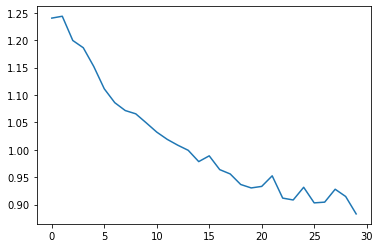

In [ ]:
plt.plot(history.history['val_loss'])

In [ ]:
base_model.trainable = True
model.compile(loss='categorical_crossentropy', optimizer = Adam(), metrics=['accuracy'])
history_stage_2 = model.fit(train_dataset, epochs=5, validation_data=val_dataset)

Epoch 1/5
181/181 [==============================] - 88s 451ms/step - loss: 14.0763 - accuracy: 0.3986 - val_loss: 1.2414 - val_accuracy: 0.4254
Epoch 2/5
181/181 [==============================] - 80s 442ms/step - loss: 1.2234 - accuracy: 0.4282 - val_loss: 1.2549 - val_accuracy: 0.4254
Epoch 3/5
181/181 [==============================] - 76s 418ms/step - loss: 1.2235 - accuracy: 0.4209 - val_loss: 1.2440 - val_accuracy: 0.4254
Epoch 4/5
181/181 [==============================] - 75s 415ms/step - loss: 1.2229 - accuracy: 0.4190 - val_loss: 1.2395 - val_accuracy: 0.4254
Epoch 5/5
181/181 [==============================] - 81s 444ms/step - loss: 1.2217 - accuracy: 0.4237 - val_loss: 1.2380 - val_accuracy: 0.4254


In [ ]:
class_weights

{0: 0.46366559485530545,
 1: 9.613333333333333,
 2: 3.605,
 3: 1.8025,
 4: 0.5243636363636364}

In [ ]:
model = build_model.simple_model()
history, model = train_model.fit(model, train_dataset, val_dataset, class_weights, optimizer=Adam)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/30
181/181 [==============================] - 13s 69ms/step - loss: 1.2356 - accuracy: 0.4145 - val_loss: 1.3360 - val_accuracy: 0.5643 - lr: 0.0010
Epoch 2/30
181/181 [==============================] - 12s 68ms/step - loss: 0.8906 - accuracy: 0.5291 - val_loss: 1.0273 - val_accuracy: 0.5705 - lr: 0.0010
Epoch 3/30
181/181 [==============================] - 12s 68ms/step - loss: 0.7452 - accuracy: 0.5967 - val_loss: 0.9390 - val_accuracy: 0.5677 - lr: 0.0010
Epoch 4/30
181/181 [==============================] - 12s 68ms/step - loss: 0.6550 - accuracy: 0.6300 - val_loss: 0.9341 - val_accuracy: 0.5657 - lr: 0.0010
Epoch 5/30
181/181 [==============================] - 12s 68ms/step - loss: 0.5899 - accuracy: 0.6579 - val_loss: 1.1635 - val_accuracy: 0.5253 - lr: 0.0010
Epoch 6/30
181/181 [==============================] - 12s 68ms/step - loss: 0.5552 - accuracy: 0.6692 - val_loss: 0.9011 - val_accuracy: 0.6272 - lr: 0.0010
Epoch 7/30
181/181 [==============================] - 12s 

## Save model

In [ ]:
model.save(os.path.join(os.getcwd(), 'drive', 'MyDrive','da2','models','resnet101'))

INFO:tensorflow:Assets written to: /content/drive/MyDrive/da2/models/resnet101/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/da2/models/resnet101/assets


In [ ]:
model = keras.models.load_model(os.path.join(os.getcwd(), 'drive', 'MyDrive','da2','models','resnet101'))

## Evaluate

In [ ]:
pred = model.predict(val_dataset)
pred = np.round(pred).astype(int).reshape(-1,)

In [ ]:
np.unique(pred, return_counts=True)

(array([0, 1]), array([2666,  654]))

In [ ]:
val_dataset_unbatched = val_dataset.unbatch()

In [ ]:
y_true = np.array([y.numpy() for x, y in val_dataset_unbatched])

In [ ]:
tf.math.confusion_matrix(y_true, pred)

InvalidArgumentError: ignored

## Evaluate One Hot

In [ ]:
pred = model.predict(val_dataset)
pred = np.argmax(pred, axis=1)

In [ ]:
val_dataset_unbatched = val_dataset.unbatch()

In [ ]:
y_true = np.array([y.numpy() for x, y in val_dataset_unbatched])
y_true = np.argmax(y_true, axis=1)

In [ ]:
tf.math.confusion_matrix(y_true, pred)

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[457,  53,   2,  55,  55],
       [ 20,  20,   0,   0,  20],
       [  0,   0,  80,   0,   0],
       [ 20,   0,   0,  60,  20],
       [ 60, 180,   0,  60, 300]], dtype=int32)>

## Apply Sliding Window

In [ ]:
from PIL import Image

img = np.asarray(Image.open(os.path.join(os.getcwd(), 'drive', 'MyDrive','da2','data','unlabeled_data','RXRIIW.png')))

In [ ]:
pred, confidence = sliding_window.find_classes(img, model, 256, 121, (256, 256)) #64 44 88

Iteration: 10 von 65
Iteration: 20 von 65
Iteration: 30 von 65
Iteration: 40 von 65
Iteration: 50 von 65
Iteration: 60 von 65


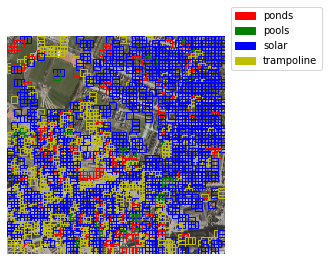

In [ ]:
bounding_box.draw(img, pred, 121)

In [ ]:
save_data.save_bounding_boxes(pred, 64)